In [1]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 載入資料集

In [2]:
import os
df_train = pd.core.frame.DataFrame()
for dirname, _, filenames in os.walk('/project/xt121-group5/scene2_data/charlie'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        df_train2 = pd.read_csv(os.path.join(dirname, filename))
#         df_train = df_train.append(df_train2, ignore_index=True)
        df_train = pd.concat([df_train, df_train2])
        
df_train = df_train.drop(labels=['RecordTime'], axis=1) # 移除 RecordTime

/project/xt121-group5/scene2_data/charlie/2023-05-05 103150_c.csv
/project/xt121-group5/scene2_data/charlie/2023-05-05 103233_nc.csv


In [3]:
print(df_train.shape)

(1752, 103)


## 檢查缺失值

In [4]:
# checked missing data
print("Before data clean(NAN mount):", len(np.where(np.isnan(df_train)==1)[0]))

Before data clean(NAN mount): 0


In [5]:
# Find columns with only unique value.
# unique_col = []
# for i in df_train.columns:
#     if np.unique(df_train[i]).shape[0]==1:
#         print(f'Get column {i} with only unique value.')
#         unique_col.append(i) 

In [6]:
# print(unique_col)

In [7]:
# df_train.describe()[unique_col]

In [8]:
# Drop columns with only unique value.
# df_train = df_train.drop(unique_col, axis=1)

## 資料前處理

In [9]:
# 列出不重要的特徵。
# 先假設除了gaze vector以外的特徵都不重要，之後再調整。
del_col = ['FaceBoundingBox_X', 'FaceBoundingBox_Y', 'FaceBoundingBox_X', 'FaceBoundingBox_Y','FaceBoundingBox_W', 
           'FaceBoundingBox_H', 'FaceLandmarks_1_X', 'FaceLandmarks_1_Y', 'FaceLandmarks_2_X','FaceLandmarks_2_Y', 
           'FaceLandmarks_3_X', 'FaceLandmarks_3_Y', 'FaceLandmarks_4_X', 'FaceLandmarks_4_Y','FaceLandmarks_5_X', 
           'FaceLandmarks_5_Y', 'FaceLandmarks_6_X', 'FaceLandmarks_6_Y', 'FaceLandmarks_7_X', 'FaceLandmarks_7_Y',
           'FaceLandmarks_8_X', 'FaceLandmarks_8_Y', 'FaceLandmarks_9_X', 'FaceLandmarks_9_Y', 'FaceLandmarks_10_X', 
           'FaceLandmarks_10_Y', 'FaceLandmarks_11_X', 'FaceLandmarks_11_Y', 'FaceLandmarks_12_X', 'FaceLandmarks_12_Y', 
           'FaceLandmarks_13_X', 'FaceLandmarks_13_Y', 'FaceLandmarks_14_X', 'FaceLandmarks_14_Y', 'FaceLandmarks_15_X', 
           'FaceLandmarks_15_Y', 'FaceLandmarks_16_X', 'FaceLandmarks_16_Y', 'FaceLandmarks_17_X', 'FaceLandmarks_17_Y', 
           'FaceLandmarks_18_X', 'FaceLandmarks_18_Y', 'FaceLandmarks_19_X', 'FaceLandmarks_19_Y', 'FaceLandmarks_20_X', 
           'FaceLandmarks_20_Y', 'FaceLandmarks_21_X', 'FaceLandmarks_21_Y', 'FaceLandmarks_22_X', 'FaceLandmarks_22_Y', 
           'FaceLandmarks_23_X', 'FaceLandmarks_23_Y', 'FaceLandmarks_24_X', 'FaceLandmarks_24_Y', 'FaceLandmarks_25_X', 
           'FaceLandmarks_25_Y', 'FaceLandmarks_26_X', 'FaceLandmarks_26_Y', 'FaceLandmarks_27_X', 'FaceLandmarks_27_Y', 
           'FaceLandmarks_28_X', 'FaceLandmarks_28_Y', 'FaceLandmarks_29_X', 'FaceLandmarks_29_Y', 'FaceLandmarks_30_X', 
           'FaceLandmarks_30_Y', 'FaceLandmarks_31_X', 'FaceLandmarks_31_Y', 'FaceLandmarks_32_X', 'FaceLandmarks_32_Y', 
           'FaceLandmarks_33_X', 'FaceLandmarks_33_Y', 'FaceLandmarks_34_X', 'FaceLandmarks_34_Y', 'FaceLandmarks_35_X', 
           'FaceLandmarks_35_Y', 'HeadPoseAngles_X','HeadPoseAngles_Y','HeadPoseAngles_Z','LeftEyeBoundingBox_X', 
           'LeftEyeBoundingBox_Y', 'LeftEyeBoundingBox_W', 'LeftEyeBoundingBox_H', 'RightEyeBoundingBox_X', 'RightEyeBoundingBox_Y', 
           'RightEyeBoundingBox_W', 'RightEyeBoundingBox_H', 'EyeLandmarks_1_X', 'EyeLandmarks_1_Y', 'EyeLandmarks_2_X', 
           'EyeLandmarks_2_Y', 'EyeLandmarks_3_X', 'EyeLandmarks_3_Y', 'EyeLandmarks_4_X', 'EyeLandmarks_4_Y', 
           'LeftEyeMidPoint_X','LeftEyeMidPoint_Y','RightEyeMidPoint_X','RightEyeMidPoint_Y', 'EyeState_Left', 
           'EyeState_Right']

In [10]:
df_train = df_train.drop(del_col, axis = 1)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
# def data_preprocessing(df_input, train=True, sc=None):
#     # numeric feature standardization
#     if train:
#         sc = StandardScaler()
# #         sc = MinMaxScaler()
#         df = sc.fit_transform(df_input.iloc[:, 0:-1])
#     else:
#         df = sc.transform(df_input)
#     return df, sc

In [13]:
# X, train_sc = data_preprocessing(df_train)

In [14]:
# print(X.shape)

In [15]:
# print(train_sc.mean_)

In [16]:
# print(train_sc.var_)

In [17]:
y = df_train['RecordType'].values

In [18]:
print(y.shape)

(1752,)


In [19]:
np.unique(y)
print(y)

[1 1 1 ... 0 0 0]


In [20]:
df_train = df_train.drop('RecordType', axis = 1)

## 切割訓練集

In [21]:
x_train , x_valid , y_train , y_valid = train_test_split(df_train, y, test_size=0.3, random_state=17, stratify=y)

In [22]:
# eval_metrics can selecy rmse, logloss, error,\
# auc, merror, mlogloss or custom define
eval_set = [(x_valid, y_valid)]
model = XGBClassifier(early_stopping_rounds=10,
                      eval_metric="auc")
model.fit(x_train,
          y_train,
          eval_set=eval_set,
          verbose=True)

[0]	validation_0-auc:0.985983
[1]	validation_0-auc:0.985983
[2]	validation_0-auc:0.986353
[3]	validation_0-auc:0.986353
[4]	validation_0-auc:0.987688
[5]	validation_0-auc:0.987765
[6]	validation_0-auc:0.990557
[7]	validation_0-auc:0.990557
[8]	validation_0-auc:0.990943
[9]	validation_0-auc:0.992255
[10]	validation_0-auc:0.992262
[11]	validation_0-auc:0.993096
[12]	validation_0-auc:0.993335
[13]	validation_0-auc:0.993366
[14]	validation_0-auc:0.993504
[15]	validation_0-auc:0.993983
[16]	validation_0-auc:0.994014
[17]	validation_0-auc:0.994592
[18]	validation_0-auc:0.994461
[19]	validation_0-auc:0.994692
[20]	validation_0-auc:0.994986
[21]	validation_0-auc:0.995094
[22]	validation_0-auc:0.995587
[23]	validation_0-auc:0.995634
[24]	validation_0-auc:0.995603
[25]	validation_0-auc:0.995803
[26]	validation_0-auc:0.995857
[27]	validation_0-auc:0.995888
[28]	validation_0-auc:0.99595
[29]	validation_0-auc:0.996258
[30]	validation_0-auc:0.996374
[31]	validation_0-auc:0.996582
[32]	validation_0-a

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              eval_metric='auc', gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [23]:
# model.predict_proba will return the probility
# model.predict will return the predict label (use 0.5 as threshold)
y_pred = model.predict_proba(x_valid)
y_pred[:5]

array([[9.9548209e-01, 4.5178919e-03],
       [9.9949414e-01, 5.0585804e-04],
       [9.8963833e-01, 1.0361681e-02],
       [1.5320182e-03, 9.9846798e-01],
       [9.9695283e-01, 3.0471757e-03]], dtype=float32)

In [24]:
# we use model.predict to get the label
y_pred = model.predict(x_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.72%


In [25]:
# we can show the feature importances for our features
print(model.feature_importances_)

[0.14062189 0.16792624 0.6914519 ]


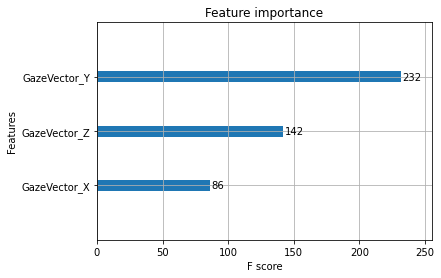

In [26]:
# import the plot_importance function to visualize the feature importance
from xgboost import plot_importance
plot_importance(model)
plt.show()

## 模型測試

In [27]:
# Test
# 測試一個答案全部為1的資料。
df_test = pd.read_csv('/project/xt121-group5/scene2_data/larry/2023-05-01 232329.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)
# test, _ = data_preprocessing(df_test, train=False, sc=train_sc)

In [28]:
pred = model.predict(df_test)
print(pred.shape)
print(type(pred))

(305,)
<class 'numpy.ndarray'>


In [29]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


In [30]:
# Test
# 測試一個答案全部為0的資料。
df_test = pd.read_csv('/project/xt121-group5/scene2_data/larry/2023-05-01 232448.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)
# test, _ = data_preprocessing(df_test, train=False, sc=train_sc)

In [31]:
pred = model.predict(df_test)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [32]:
# Test
# 測試一個Charlie眼睛明顯看螢幕外面的資料。
df_test = pd.read_csv('/project/xt121-group5/scene2_data/charlie_old/2023-05-02 234906_nc.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)

In [33]:
pred = model.predict(df_test)
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
# Test
# 測試一個Charlie眼睛專注電腦螢幕的資料。
df_test = pd.read_csv('/project/xt121-group5/scene2_data/charlie_old/2023-05-05 100605_c.csv')
# df_test = df_test.drop(unique_col, axis=1)
df_test = df_test.drop(del_col, axis=1)
df_test = df_test.drop(labels=['RecordTime'], axis=1)
df_test = df_test.drop(labels=['RecordType'], axis=1)

In [35]:
pred = model.predict(df_test)
print(pred)

[1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]


In [36]:
# Save model
import joblib
cla(model, './XGB_model')

# Load model
# loaded_xgb_model = joblib.load('./XGB_model')

['./XGB_model']